# <a id='toc1_'></a>[Yulu Bikes Case Study](#toc0_)

By Gautam Naik (gautamnaik1994@gmail.com)  
Github: https://github.com/gautamnaik1994/Yulu-Bike-Data-Analysis-Case-Study

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Business Problem**

The company wants to know:

*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands

**Dataset**

| Column Name | Description                                                                                                             |
|-------------|-------------------------------------------------------------------------------------------------------------------------|
| datetime    | datetime                                                                                                                |
| season      | season (1: spring, 2: summer, 3: fall, 4: winter)                                                                      |
| holiday     | whether day is a holiday or not (extracted from [DC Government Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule)) |
| workingday  | if day is neither weekend nor holiday is 1, otherwise is 0.                                                            |
| weather     | 1: Clear, Few clouds, partly cloudy, partly cloudy <br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp        | temperature in Celsius                                                                                                  |
| atemp       | feeling temperature in Celsius                                                                                         |
| humidity    | humidity                                                                                                                |
| windspeed   | wind speed                                                                                                              |
| casual      | count of casual users                                                                                                   |
| registered  | count of registered users                                                                                                |
| count       | count of total rental bikes including both casual and registered                                                       |




**Table of contents**<a id='toc0_'></a>    
- [Yulu Bikes Case Study](#toc1_)    
- [Data Cleaning, Preprocessing and Feature Engineering](#toc2_)    
  - [Adding Features](#toc2_1_)    
  - [Basic Stats](#toc2_2_)    
  - [Outlier Detection](#toc2_3_)    
  - [Checking Distributions](#toc2_4_)    
- [EDA](#toc3_)    
  - [Comparing Count with Categorical Variables](#toc3_1_)    
    - [Month](#toc3_1_1_)    
    - [Season](#toc3_1_2_)    
    - [Weather](#toc3_1_3_)    
    - [Weekday](#toc3_1_4_)    
    - [Working Day](#toc3_1_5_)    
    - [Time of Day](#toc3_1_6_)    
    - [Temperature](#toc3_1_7_)    
    - [Humidity](#toc3_1_8_)    
    - [Wind Speed](#toc3_1_9_)    
  - [Comparing Count with Numeric Variables](#toc3_2_)    
- [Hypothesis Testing](#toc4_)    
  - [Weather vs Season](#toc4_1_)    
  - [Working Day vs Holiday](#toc4_2_)    
  - [Comparison between seasons](#toc4_3_)    
    - [Variance check](#toc4_3_1_)    
    - [Normality Test](#toc4_3_2_)    
    - [ANOVA](#toc4_3_3_)    
  - [Comparison between weather conditions](#toc4_4_)    
    - [Variance check](#toc4_4_1_)    
    - [Normality Test](#toc4_4_2_)    
    - [ANOVA Test](#toc4_4_3_)    
- [Recommendation and Insights](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [9]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway, chi2_contingency, levene, shapiro
import statsmodels.api as sm
sns.set_style("whitegrid")
import duckdb as db
import pickle 
from statsmodels.formula.api import ols
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

# <a id='toc2_'></a>[Data Cleaning, Preprocessing and Feature Engineering](#toc0_)

In [10]:
df=pd.read_csv("./bike_sharing.csv")
df.sample(10)

datetime  season  holiday  workingday  weather   temp  \
2246  2011-06-01 12:00:00       2        0           1        1  35.26   
2088  2011-05-13 22:00:00       2        0           1        2  21.32   
2648  2011-06-18 06:00:00       2        0           0        1  25.42   
6657  2012-03-14 16:00:00       1        0           1        1  29.52   
2352  2011-06-05 22:00:00       2        0           0        1  26.24   
9606  2012-10-04 15:00:00       4        0           1        1  29.52   
5580  2012-01-07 15:00:00       1        0           0        1  23.78   
4310  2011-10-11 15:00:00       4        0           1        2  24.60   
2239  2011-06-01 05:00:00       2        0           1        2  27.06   
6463  2012-03-06 13:00:00       1        0           1        1  12.30   

       atemp  humidity  windspeed  casual  registered  count  
2246  41.665        53     0.0000      32         137    169  
2088  25.000        83    15.0013      25         107    132  
2648  28.790        83     7.0015       9          18     27  
6657  31.820        25    12.9980      78         278    356  
2352  29.545        78    15.0013      36          94    130  
9606  33.335        54    19.0012      77         248    325  
5580  27.275        37    19.9995     132         317    449  
4310  28.790        78    11.0014      36         139    175  
2239  29.545        89     6.0032       2          19     21  
6463  15.150        39     8.9981      16         148    164

In [11]:
df.shape

(10886, 12)

In [12]:
df=df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- No null values are present in the dataset.
- There are 10886 entries in the dataset.

## <a id='toc2_1_'></a>[Adding Features](#toc0_)

In [14]:
morning_period = (5, 11)
afternoon_period = (12, 16)
evening_period = (17, 20)
night_period = (21, 23)
late_night_period = (0, 4)

cold=(0,10)
cool=(11,20)
warm=(21,30)
hot=(31,40)
very_hot=(41,50)

low_humidity=(0,30)
medium_humidity=(31,60)
high_humidity=(61,100)

gentle_breeze=(0,10)
moderate_breeze=(11,20)
strong_breeze=(21,30)
moderate_gale=(31,50)

def categorize_wind_speed(wind_speed):
    if gentle_breeze[0] <= wind_speed <= gentle_breeze[1]:
        return 'Gentle Breeze'
    elif moderate_breeze[0] <= wind_speed <= moderate_breeze[1]:
        return 'Moderate Breeze'
    elif strong_breeze[0] <= wind_speed <= strong_breeze[1]:
        return 'Strong Breeze'
    else:
        return 'Moderate Gale'

# Function to categorize time periods
def categorize_time_period(hour):
    if morning_period[0] <= hour <= morning_period[1]:
        return 'Morning'
    elif afternoon_period[0] <= hour <= afternoon_period[1]:
        return 'Afternoon'
    elif evening_period[0] <= hour <= evening_period[1]:
        return 'Evening'
    elif night_period[0] <= hour <= night_period[1]:
        return 'Night'
    else:
        return 'Late Night'
    
def categorize_temperature(temperature):
    if cold[0] <= temperature <= cold[1]:
        return 'Cold'
    elif cool[0] <= temperature <= cool[1]:
        return 'Cool'
    elif warm[0] <= temperature <= warm[1]:
        return 'Warm'
    elif hot[0] <= temperature <= hot[1]:
        return 'Hot'
    else:
        return 'Very Hot'
    
def categorize_humidity(humidity):
    if low_humidity[0] <= humidity <= low_humidity[1]:
        return 'Low'
    elif medium_humidity[0] <= humidity <= medium_humidity[1]:
        return 'Medium'
    else:
        return 'High'

    
def rename_season(season):
    # season (1: spring, 2: summer, 3: fall, 4: winter) 
    if season == 1:
        return 'Spring'
    elif season == 2:
        return 'Summer'
    elif season == 3:
        return 'Fall'
    else:
        return 'Winter'
    
def rename_weather(weather):
    if weather == 1:
        return 'Clear Weather'
    elif weather == 2:
        return 'Cloudy or Misty'
    elif weather == 3:
        return 'Light Rain or Snow'
    return 'Heavy Rain or Snow'

def rename_quarter(quarter):
    if quarter == 1:
        return 'First Quarter'
    elif quarter == 2:
        return 'Second Quarter'
    elif quarter == 3:
        return 'Third Quarter'
    return 'Fourth Quarter'

In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour
df["month"] = df["datetime"].dt.month_name()
df["date"] = df["datetime"].dt.date
df["day_of_week"] = df["datetime"].dt.day_name()
df["holiday"] = df["holiday"].apply(lambda x: "Yes" if x == 1 else "No")
df["workingday"] = df["workingday"].apply(lambda x: "Yes" if x == 1 else "No")
df["date"]=pd.to_datetime(df["date"])
df["temperature_category"] = df["temp"].apply(categorize_temperature)
df["humidity_category"] = df["humidity"].apply(categorize_humidity)
df["wind_speed_category"] = df["windspeed"].apply(categorize_wind_speed)
df["session"] = df["hour"].apply(categorize_time_period)
df["season"] = df["season"].apply(rename_season)
df["weather"] = df["weather"].apply(rename_weather)
df=df.drop(["datetime","hour"], axis=1)

In [16]:
df.sample(10)

season holiday workingday          weather   temp   atemp  humidity  \
2679  Summer      No         No  Cloudy or Misty  30.34  33.335        51   
7236  Summer      No        Yes    Clear Weather  21.32  25.000        55   
3002    Fall      No        Yes    Clear Weather  27.06  31.060        69   
9424    Fall      No         No    Clear Weather  22.14  25.760        64   
1896  Summer      No        Yes    Clear Weather  19.68  23.485        39   
4238  Winter      No         No    Clear Weather  27.06  31.060        39   
9700  Winter     Yes         No  Cloudy or Misty  17.22  21.210        62   
290   Spring      No        Yes    Clear Weather   9.02   9.850        41   
7393  Summer      No        Yes  Cloudy or Misty  21.32  25.000        77   
8999    Fall      No        Yes    Clear Weather  27.88  12.120        65   

      windspeed  casual  registered  count      month       date day_of_week  \
2679     0.0000     149         214    363       June 2011-06-19      Sunday   
7236     7.0015      27         240    267      April 2012-04-19    Thursday   
3002    19.9995      14          32     46       July 2011-07-14    Thursday   
9424     0.0000      35          82    117  September 2012-09-16      Sunday   
1896    12.9980      30         135    165        May 2011-05-05    Thursday   
4238     0.0000     262         234    496    October 2011-10-08    Saturday   
9700    12.9980      82         323    405    October 2012-10-08      Monday   
290     30.0026       2          81     83    January 2011-01-13    Thursday   
7393    12.9980      62         128    190        May 2012-05-07      Monday   
8999     8.9981      43         625    668     August 2012-08-17      Friday   

     temperature_category humidity_category wind_speed_category     session  
2679             Very Hot            Medium       Gentle Breeze   Afternoon  
7236                 Warm            Medium       Gentle Breeze       Night  
3002                 Warm              High     Moderate Breeze  Late Night  
9424                 Warm              High       Gentle Breeze  Late Night  
1896                 Cool            Medium     Moderate Breeze       Night  
4238                 Warm            Medium       Gentle Breeze   Afternoon  
9700                 Cool              High     Moderate Breeze   Afternoon  
290                  Cold            Medium       Moderate Gale   Afternoon  
7393                 Warm              High     Moderate Breeze     Morning  
8999                 Warm              High       Gentle Breeze     Morning

In [17]:
categorical_columns = ["season","holiday","workingday","weather", "month", "day_of_week", "session","temperature_category","humidity_category","wind_speed_category" ]

df[categorical_columns] = df[categorical_columns].astype('category')
df[["casual","registered","count","humidity"]] = df[["casual","registered","count","humidity"]].astype(np.int16)
df[["temp","atemp","windspeed"]] = df[["temp","atemp","windspeed"]].astype(np.float32)
df['month'] = pd.Categorical(df['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df["day_of_week"] = pd.Categorical(df["day_of_week"], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

## <a id='toc2_2_'></a>[Basic Stats](#toc0_)

In [18]:
df.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.230862     23.655085     61.886460     12.799396     36.021955   
min        0.820000      0.760000      0.000000      0.000000      0.000000   
25%       13.940000     16.665001     47.000000      7.001500      4.000000   
50%       20.500000     24.240000     62.000000     12.998000     17.000000   
75%       26.240000     31.059999     77.000000     16.997900     49.000000   
max       41.000000     45.455002    100.000000     56.996899    367.000000   
std        7.791600      8.474654     19.245033      8.164592     49.960477   

         registered         count                           date  
count  10886.000000  10886.000000                          10886  
mean     155.552177    191.574132  2011-12-26 18:23:52.592320256  
min        0.000000      1.000000            2011-01-01 00:00:00  
25%       36.000000     42.000000            2011-07-02 00:00:00  
50%      118.000000    145.000000            2012-01-01 00:00:00  
75%      222.000000    284.000000            2012-07-01 00:00:00  
max      886.000000    977.000000            2012-12-19 00:00:00  
std      151.039033    181.144454                            NaN

In [19]:
df.describe(include=["category","object"])

season holiday workingday        weather  month day_of_week  \
count    10886   10886      10886          10886  10886       10886   
unique       4       2          2              4     12           7   
top     Winter      No        Yes  Clear Weather    May    Saturday   
freq      2734   10575       7412           7192    912        1584   

       temperature_category humidity_category wind_speed_category  session  
count                 10886             10886               10886    10886  
unique                    5                 3                   4        5  
top                    Warm              High     Moderate Breeze  Morning  
freq                   4007              5684                5052     3182

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   season                10886 non-null  category      
 1   holiday               10886 non-null  category      
 2   workingday            10886 non-null  category      
 3   weather               10886 non-null  category      
 4   temp                  10886 non-null  float32       
 5   atemp                 10886 non-null  float32       
 6   humidity              10886 non-null  int16         
 7   windspeed             10886 non-null  float32       
 8   casual                10886 non-null  int16         
 9   registered            10886 non-null  int16         
 10  count                 10886 non-null  int16         
 11  month                 10886 non-null  category      
 12  date                  10886 non-null  datetime64[ns]
 13  day_of_week     

## <a id='toc2_3_'></a>[Outlier Detection](#toc0_)

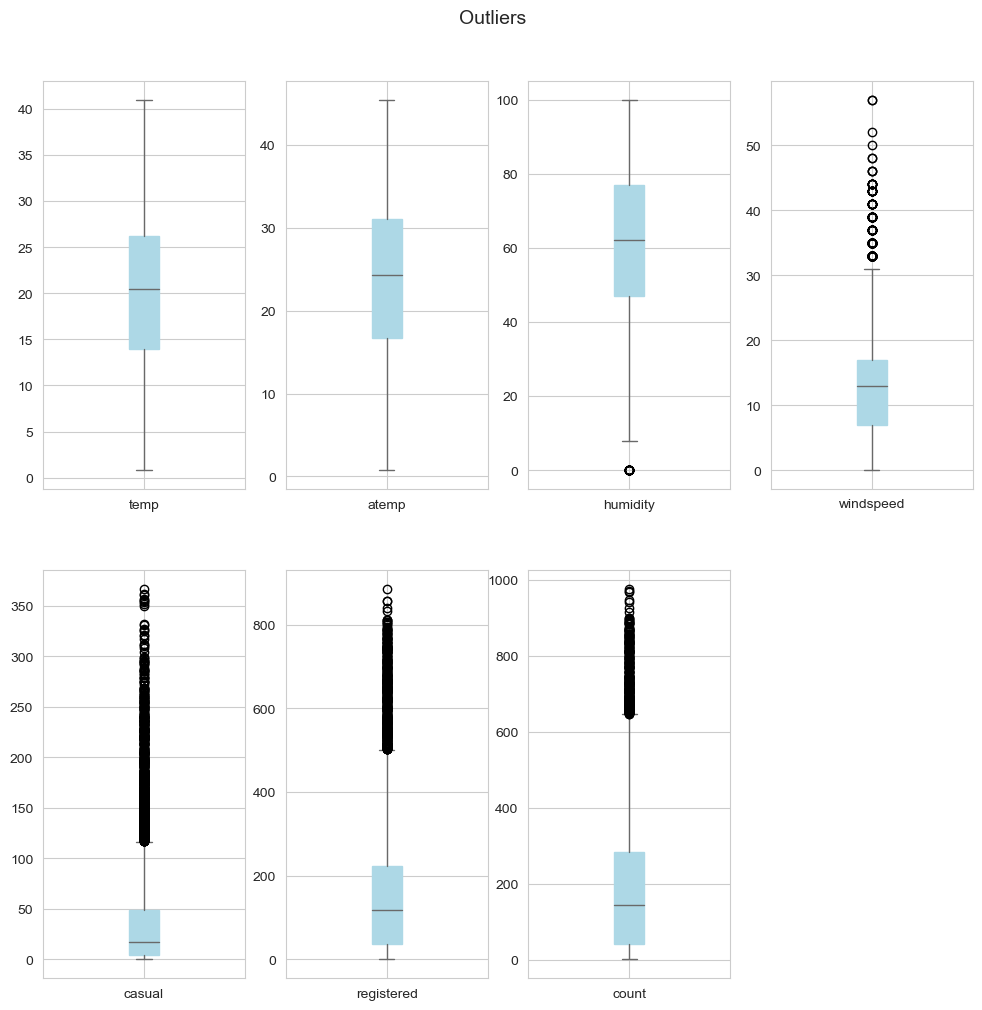

In [21]:
colors = dict(boxes='lightblue', whiskers='dimgrey', medians='dimgrey', caps='dimgrey')
df.plot(kind='box', subplots=True, layout=(3, 4), sharex=False, figsize=(12, 18), patch_artist=True, color=colors);
plt.suptitle("Outliers", y=0.92, fontsize=14);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- There are lot of outliers in the dataset for casual, registered, count and windspeed.
- We will not remove this as this will result in loss of data.

## <a id='toc2_4_'></a>[Checking Distributions](#toc0_)

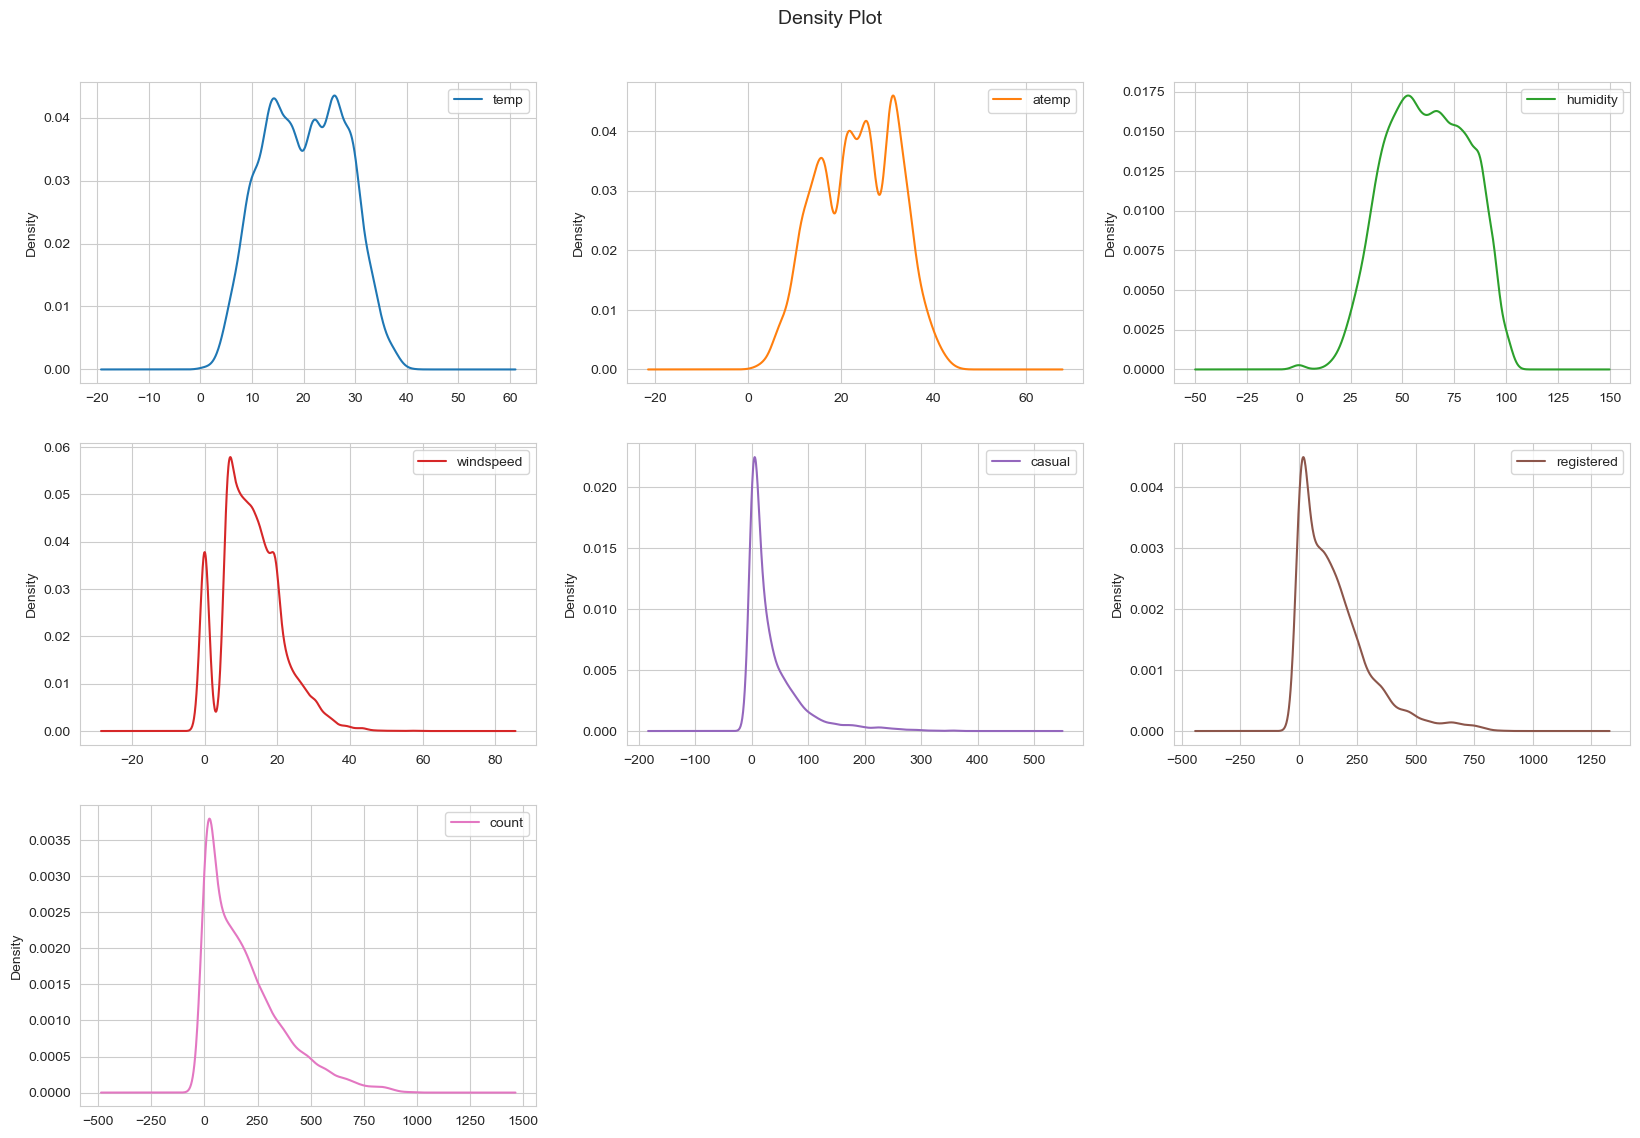

In [65]:
df.drop(["date"], axis=1).plot(kind='kde', subplots=True, layout=(4, 3), sharex=False, figsize=(20, 18), sharey=False);
plt.suptitle("Density Plot", y=0.92, fontsize=14);

- Above charts show the dessity plots of the numerical columns

In [22]:
numerical_columns=[ 'temp','atemp','humidity', 'windspeed', 'casual', 'registered', 'count']

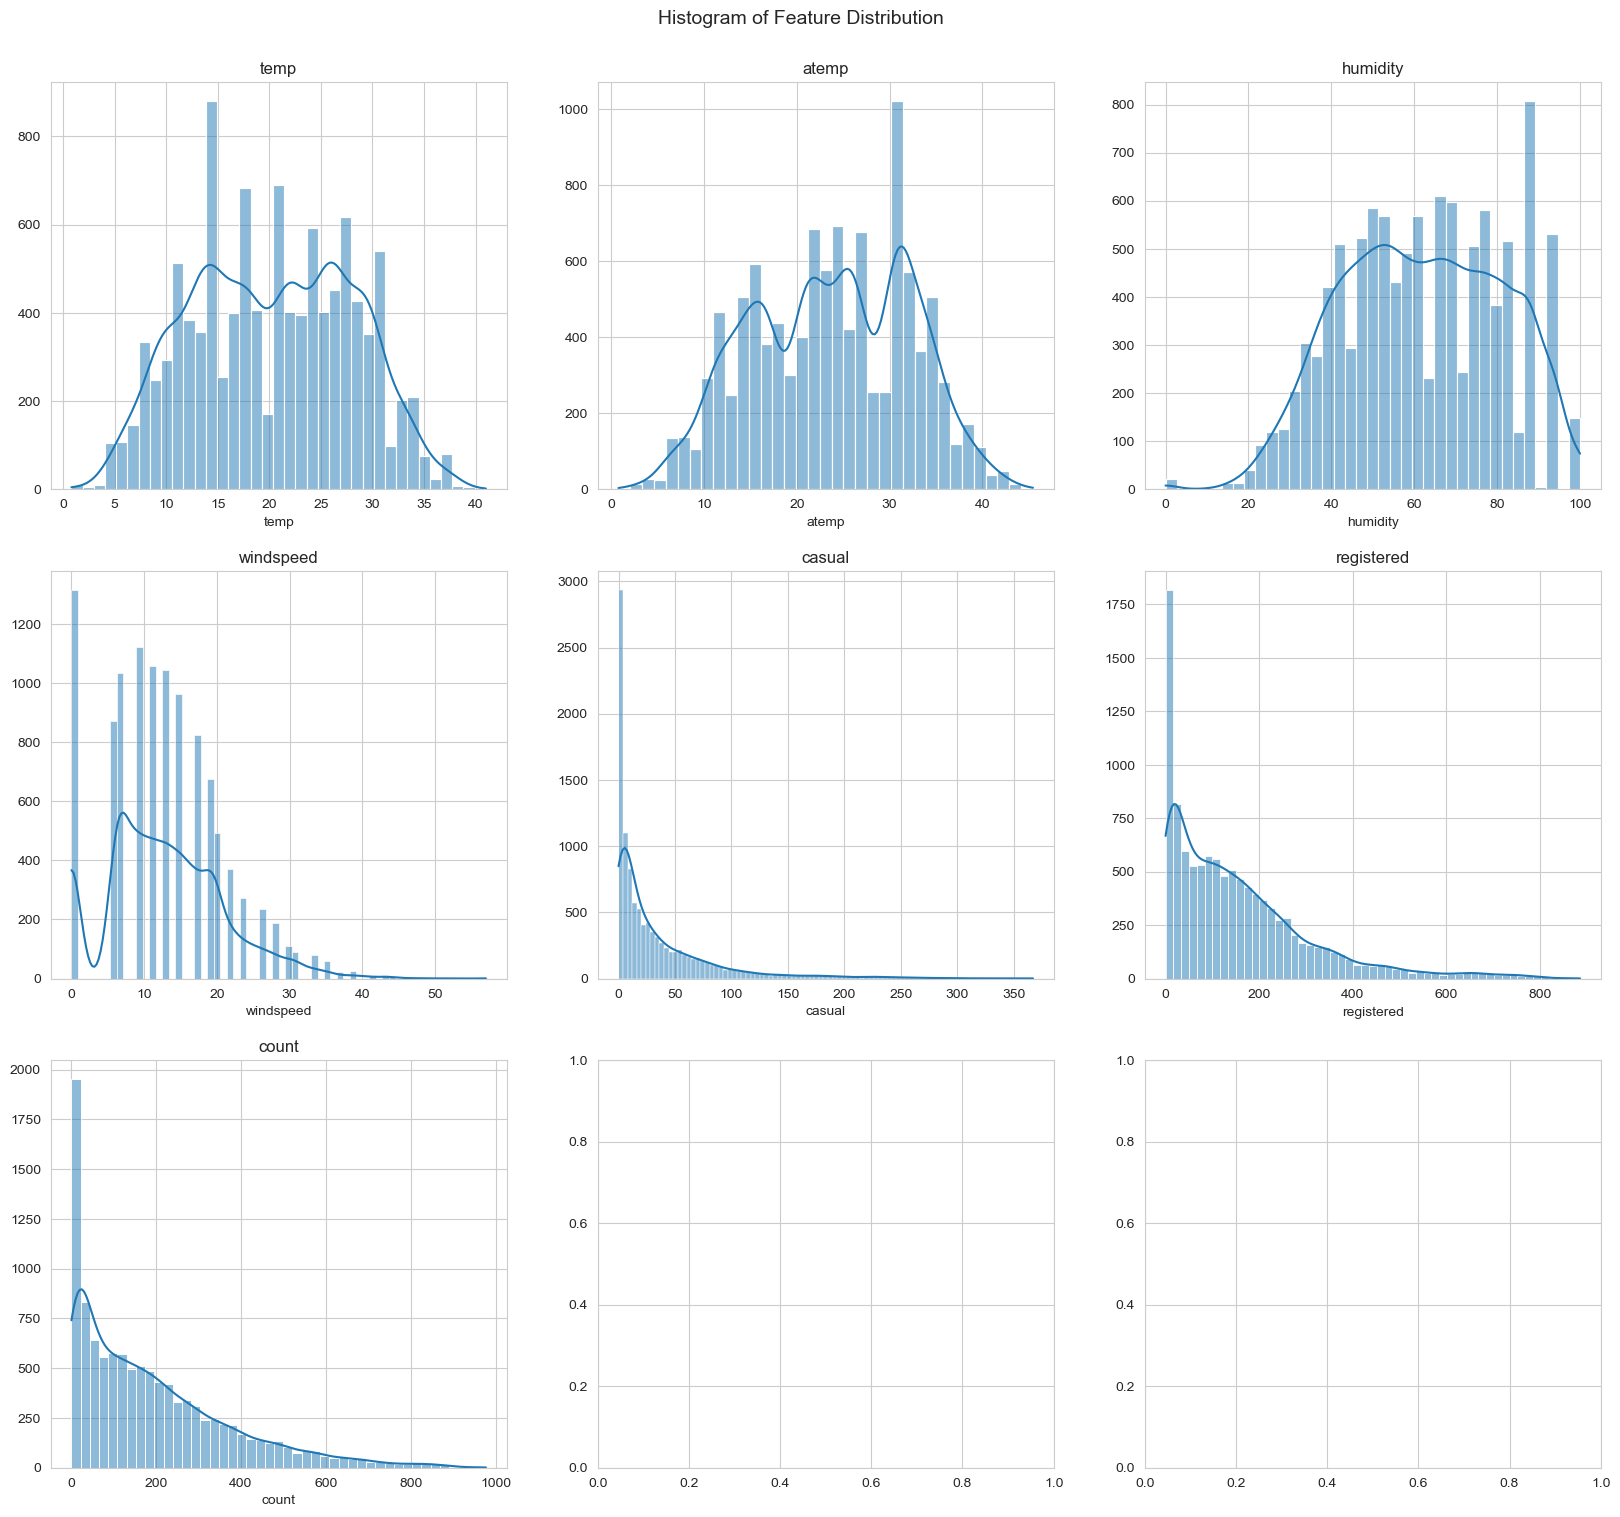

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18), sharex=False, sharey=False)

for col, ax in zip(numerical_columns, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('')

plt.suptitle("Histogram of Feature Distribution", y=0.92, fontsize=14)
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- Casual, Registered and Count column does not appear to be normally distributed
- Windspeed, Count, Registered and Casual columns are not normally distributed

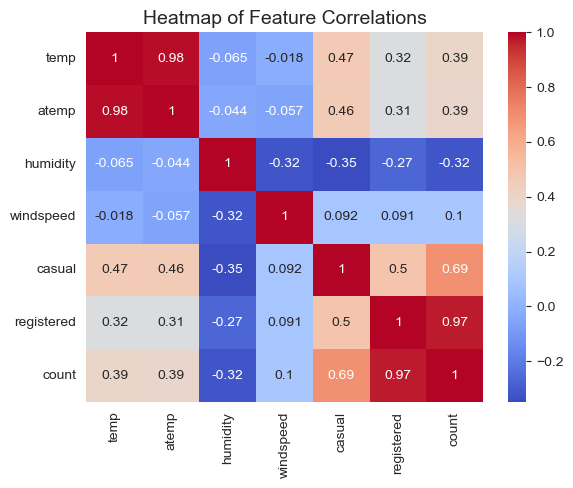

In [24]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations", fontsize=14);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- We can see that "atemp" is highly correlated with "temp". We can drop the "atemp" column.
- We can see that casual and registered count are highly corelated, but will not be dropping to prevent loss of data.

In [25]:
df=df.drop(["atemp"], axis=1)

In [68]:
# df["log_count"] = np.log1p(df["count"])
# df["log_casual"] = np.log1p(df["casual"])
# df["log_registered"] = np.log1p(df["registered"])

In [26]:
with open("./data.pickle", "wb") as f:
    pickle.dump(df,f)

In [3]:
with open("./data.pickle", "rb") as f:
    df=pickle.load(f)

# <a id='toc3_'></a>[EDA](#toc0_)

## <a id='toc3_1_'></a>[Comparing Count with Categorical Variables](#toc0_)

In [135]:
monthly_df = df.groupby(["month"])[["count","casual","registered"]].sum().reset_index()
monthly_df = pd.melt(monthly_df, id_vars=['month', 'count'], var_name='type', value_name='value')

seasonly_df = df.groupby(["season"])[["count","casual","registered"]].sum().reset_index()
seasonly_df = pd.melt(seasonly_df, id_vars=['season', 'count'], var_name='type', value_name='value')

weather_df = df.groupby(["weather"])[["count","casual","registered"]].sum().reset_index()
weather_df = pd.melt(weather_df, id_vars=['weather', 'count'], var_name='type', value_name='value')

session_df = df.groupby(["session"])[["count","casual","registered"]].sum().reset_index()
session_df = pd.melt(session_df, id_vars=['session', 'count'], var_name='type', value_name='value')

weekday_df = df.groupby(["day_of_week"], sort=False)[["count","casual","registered"]].sum().reset_index()
weekday_df = pd.melt(weekday_df, id_vars=['day_of_week', 'count'], var_name='type', value_name='value')

weekday_df_stacked = df.groupby(["day_of_week"])[["casual","registered"]].sum().reset_index()

working_day_df = df.groupby(["workingday"])[["count","casual","registered"]].sum().reset_index()
working_day_df = pd.melt(working_day_df, id_vars=['workingday', 'count'], var_name='type', value_name='value')

temperature_df = df.groupby(["temperature_category"])[["count","casual","registered"]].sum().reset_index()
temperature_df = pd.melt(temperature_df, id_vars=['temperature_category', 'count'], var_name='type', value_name='value')

humidity_df = df.groupby(["humidity_category"])[["count","casual","registered"]].sum().reset_index()
humidity_df = pd.melt(humidity_df, id_vars=['humidity_category', 'count'], var_name='type', value_name='value')

wind_speed_df = df.groupby(["wind_speed_category"])[["count","casual","registered"]].sum().reset_index()
wind_speed_df = pd.melt(wind_speed_df, id_vars=['wind_speed_category', 'count'], var_name='type', value_name='value')

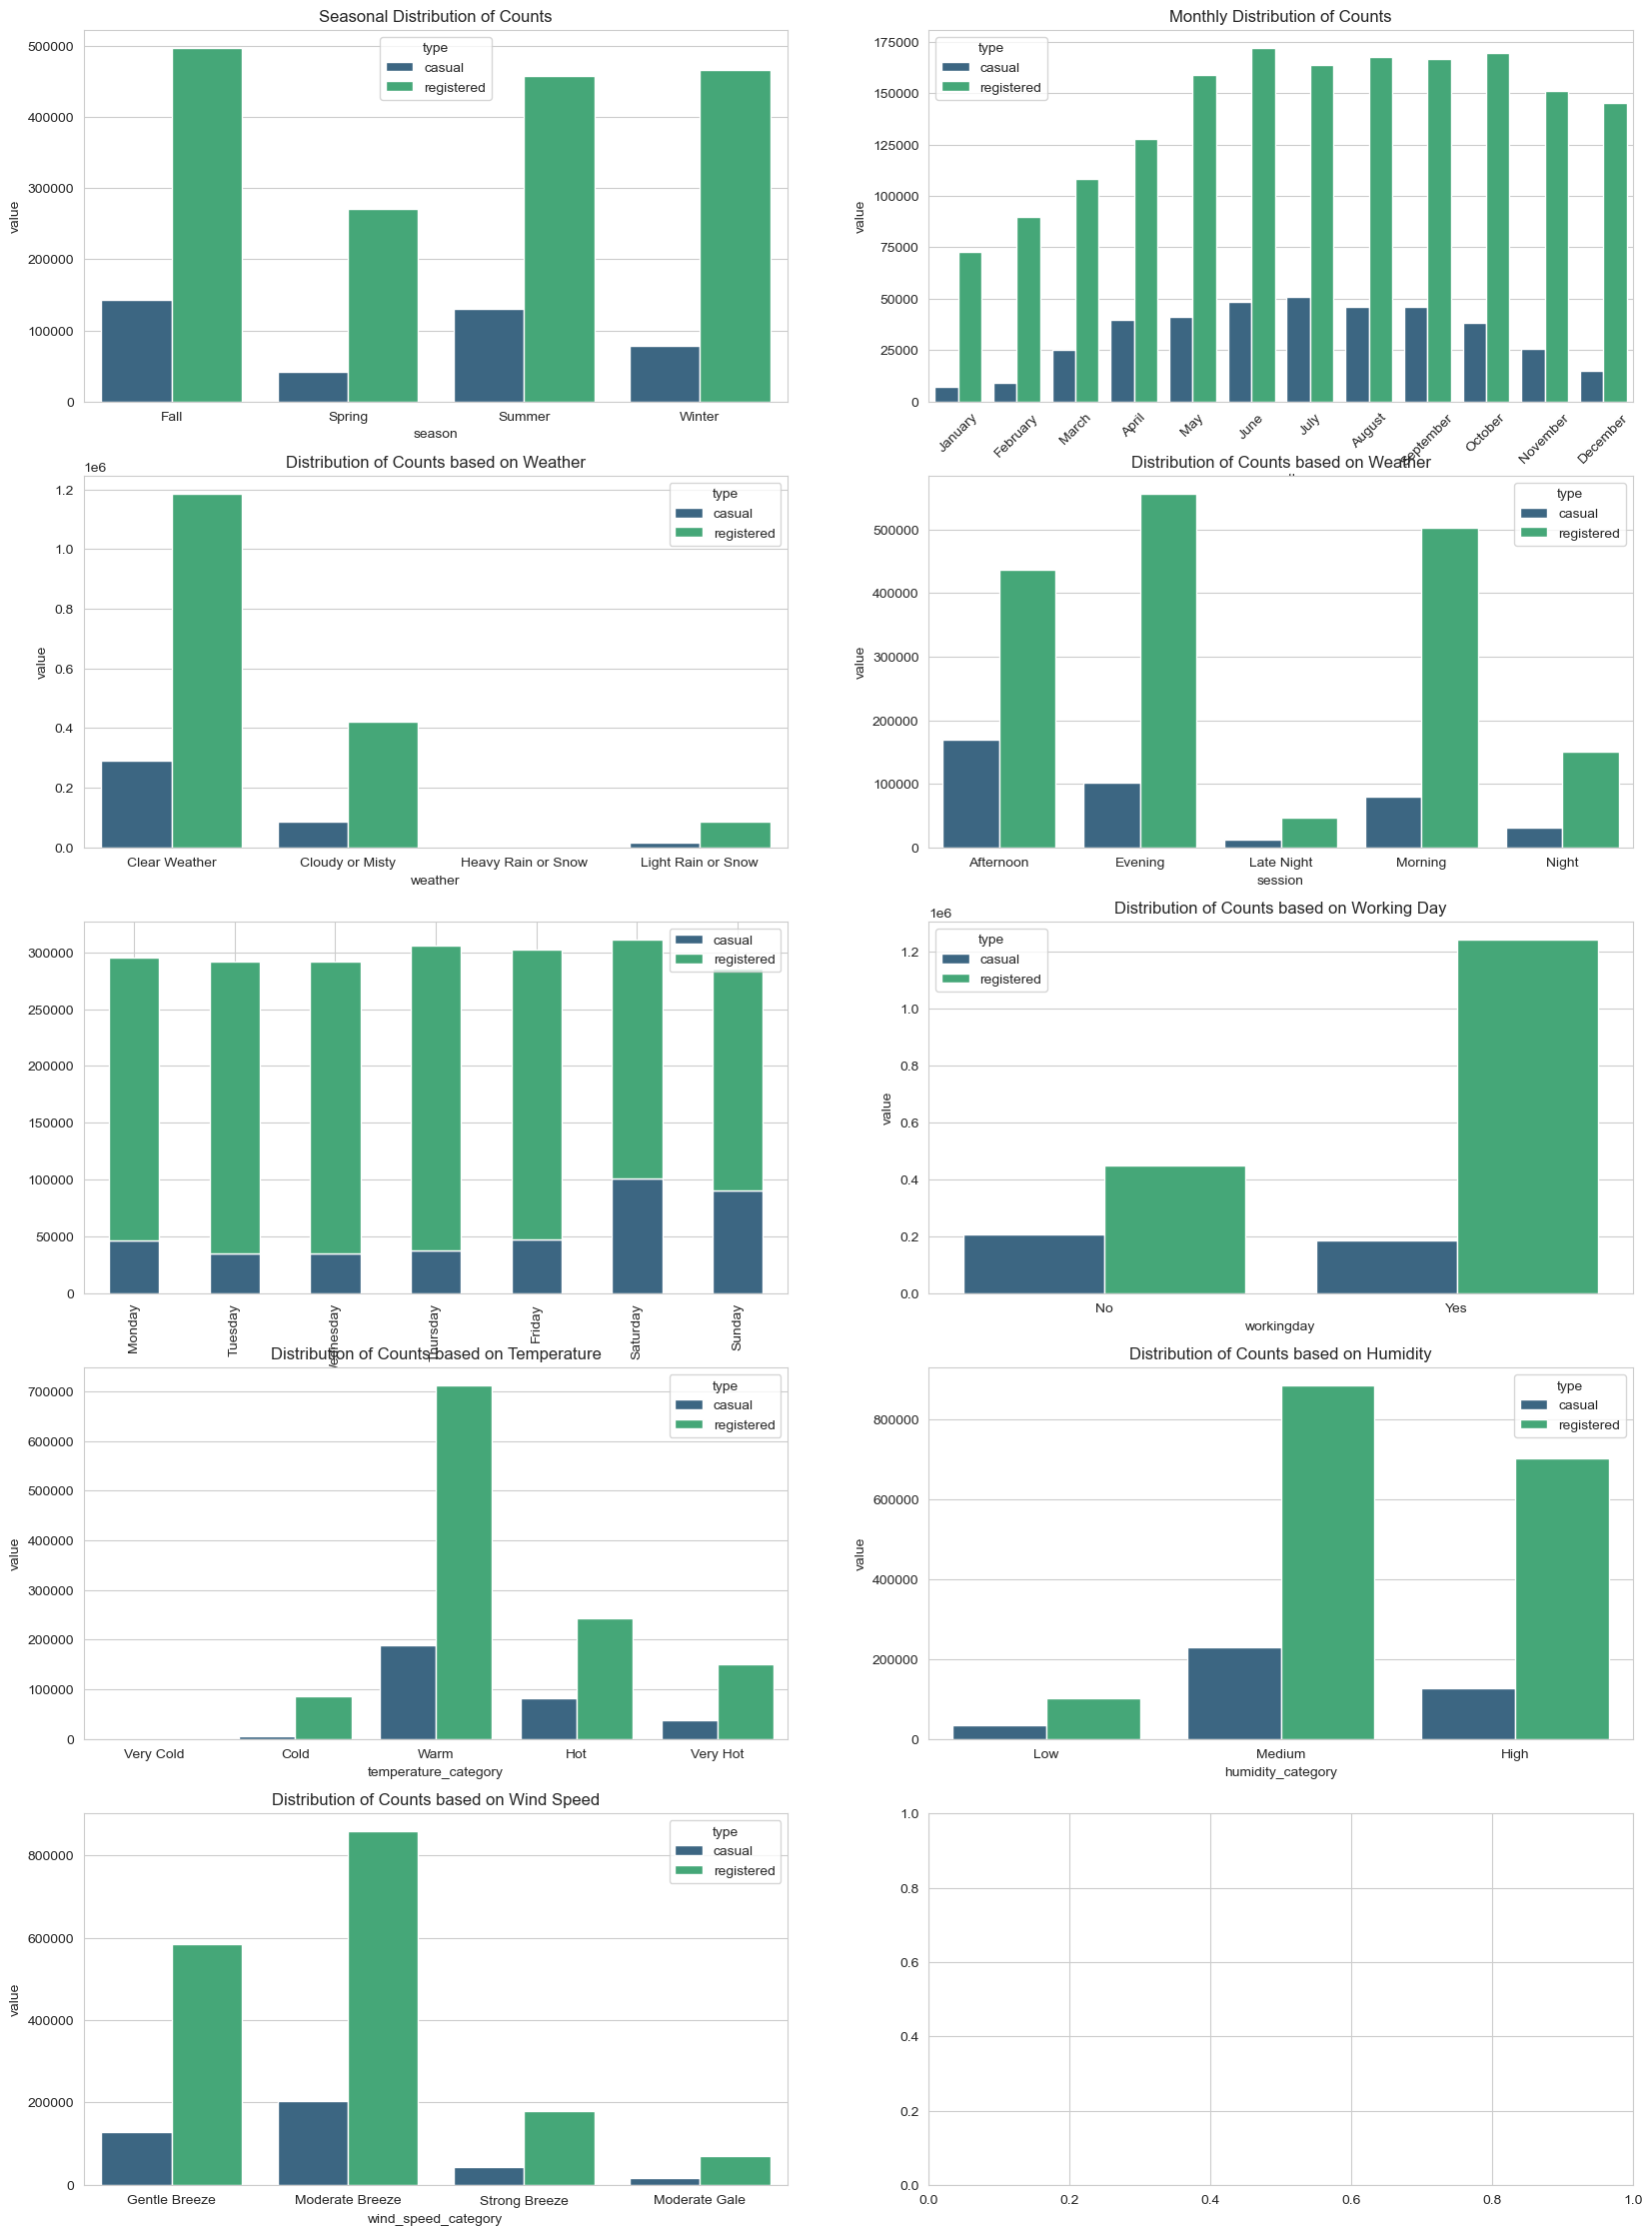

In [137]:
fig, axes = plt.subplots(5, 2, figsize=(20, 28))

sns.barplot(x='season', y='value', hue='type', data=seasonly_df, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Seasonal Distribution of Counts");

sns.barplot(x='month', y='value', hue='type', data=monthly_df, palette='viridis', order=df['month'].cat.categories, ax=axes[0, 1])
axes[0, 1].set_title("Monthly Distribution of Counts");
plt.setp(axes[0,1].get_xticklabels(), rotation=45)

sns.barplot(x='weather', y='value', hue='type', data=weather_df, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Counts based on Weather");

sns.barplot(x='session', y='value', hue='type', data=session_df, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Counts based on Weather");

# sns.barplot(x='day_of_week', y='value', hue='type', data=weekday_df, palette='viridis', ax=axes[2, 0], order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
# axes[2, 1].set_title("Distribution of Counts based on Weekday");

weekday_df_stacked.set_index('day_of_week').plot(kind='bar', stacked=True, ax=axes[2, 0], color=['#3c6682','#45a778']);
axes[2, 1].set_title("Distribution of Counts based on Weekday");

sns.barplot(x='workingday', y='value', hue='type', data=working_day_df, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title("Distribution of Counts based on Working Day");

sns.barplot(x='temperature_category', y='value', hue='type', data=temperature_df, palette='viridis', ax=axes[3, 0], order=["Very Cold", "Cold", "Warm", "Hot", "Very Hot"])
axes[3, 0].set_title("Distribution of Counts based on Temperature");

sns.barplot(x='humidity_category', y='value', hue='type', data=humidity_df, palette='viridis', ax=axes[3, 1], order=["Low", "Medium", "High" ])
axes[3, 1].set_title("Distribution of Counts based on Humidity");

sns.barplot(x='wind_speed_category', y='value', hue='type', data=wind_speed_df, palette='viridis', ax=axes[4, 0], order=["Gentle Breeze","Moderate Breeze","Strong Breeze","Moderate Gale"])
axes[4, 0].set_title("Distribution of Counts based on Wind Speed");

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

### <a id='toc3_1_1_'></a>[Month](#toc0_)
- We can see that demand is high throughout June, July, August, September and October.
- After October, demand keeps dropping till January
- Demand starts increasing after from February onwards.

### <a id='toc3_1_2_'></a>[Season](#toc0_)
- We can see that during Fall season, high demand was observed
- Summer and Winter seasons had equal demand
- Spring season had the lowest demand

### <a id='toc3_1_3_'></a>[Weather](#toc0_)
- Highest demand was observed during clear weather.
- The demand decreased as the condition of the weather decreased.

### <a id='toc3_1_4_'></a>[Weekday](#toc0_)
- All days of the week have similar demand.
- On weekends there is increased number of casual users as compared to other days.

### <a id='toc3_1_5_'></a>[Working Day](#toc0_)
- Demand is higher on a working day.

### <a id='toc3_1_6_'></a>[Time of Day](#toc0_)
- Evening time has the highest demand.
- Morning and afternoon time have medium demand.
- Night and Late Night has the lowest demand.

### <a id='toc3_1_7_'></a>[Temperature](#toc0_)
- There is highest demand during warm(21 - 30 degrees celsius) and cool(11-20 degree celsius) temperatures.
- The demand decreases as the temperature increases above 30 degrees celsius.
- The demand decreases as the temperature deceases below 10 degrees celsius.

### <a id='toc3_1_8_'></a>[Humidity](#toc0_)
- There is higher demand during medium to high humidity conditions.
- There is low demand during low humidity conditions.

### <a id='toc3_1_9_'></a>[Wind Speed](#toc0_)
- There is high demand during gentle breeze and moderate breeze
- There is low demand during strong breeze and moderate gale.

## <a id='toc3_2_'></a>[Comparing Count with Numeric Variables](#toc0_)

In [144]:
monthly_grouped_df=df[["month","count"]].groupby("month",sort=False).mean().reset_index()

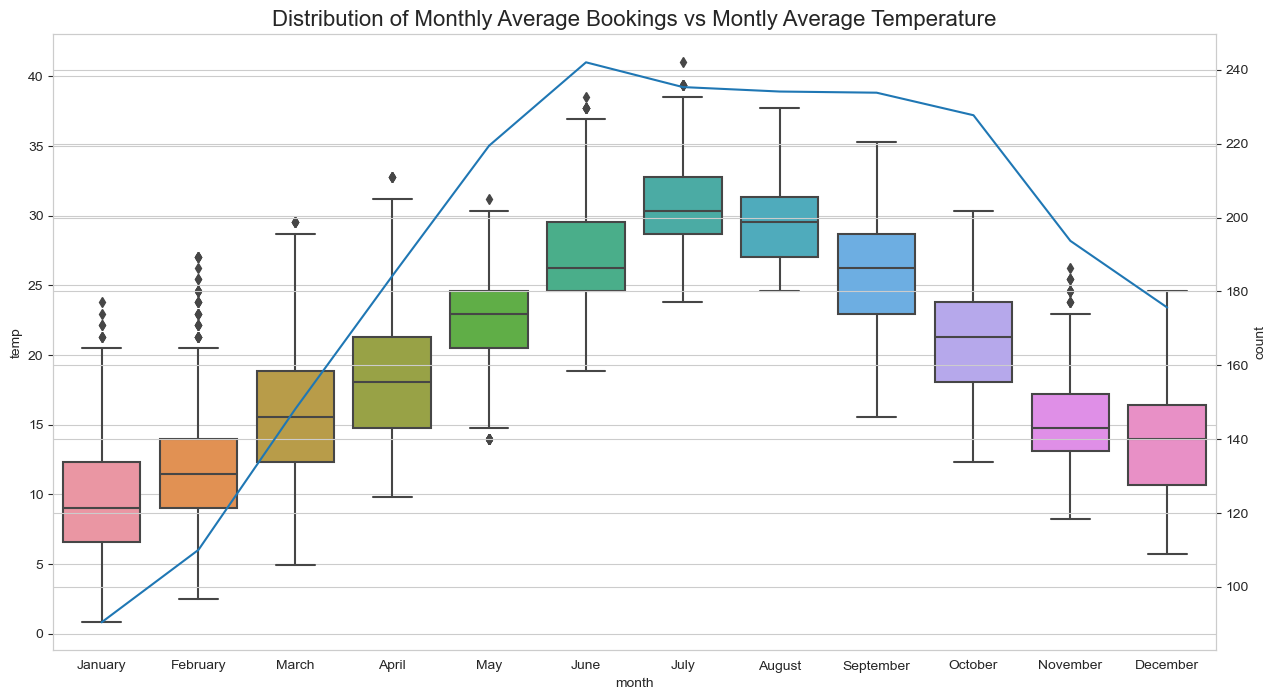

In [145]:
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.boxplot(x="month", y="temp", data=df, ax=ax1, order=df['month'].cat.categories)
ax2 = ax1.twinx()
sns.lineplot(x="month", y="count", data=monthly_grouped_df, ax=ax2, sort=False)
plt.title("Distribution of Monthly Average Bookings vs Montly Average Temperature", fontsize=16);
plt.show();


<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plot we can see that demand increases as the temperature increases and demand decreases as the temperature decreases.

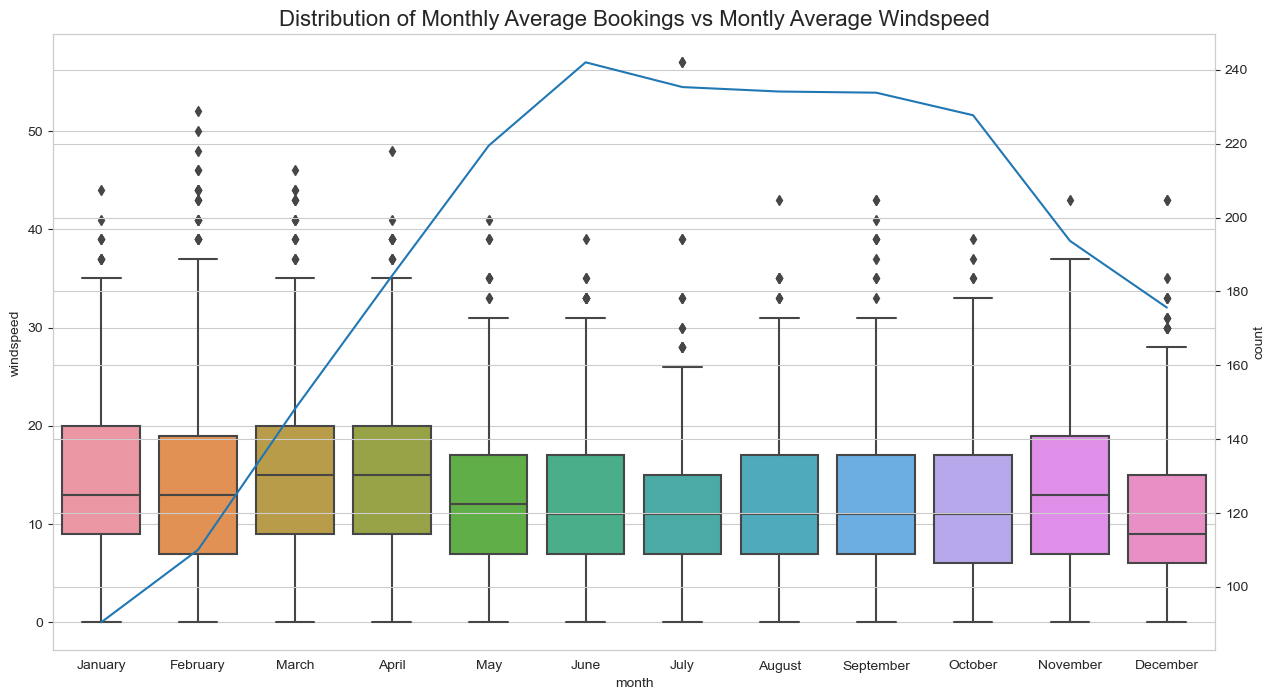

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.boxplot(x="month", y="windspeed", data=df, ax=ax1, order=df['month'].cat.categories)
ax2 = ax1.twinx()
sns.lineplot(x="month", y="count", data=monthly_grouped_df, ax=ax2, sort=False)
plt.title("Distribution of Monthly Average Bookings vs Montly Average Windspeed", fontsize=16);
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plot we can say that windspeed is not a contributing factor to demand.

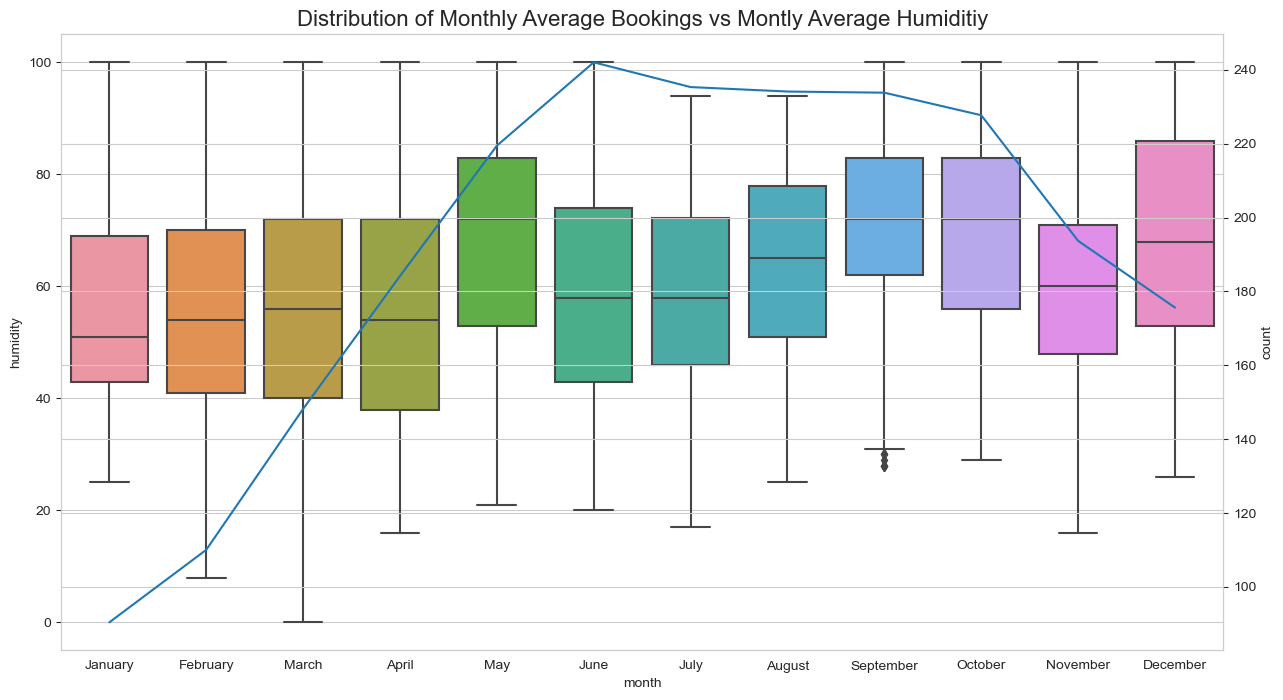

In [148]:
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.boxplot(x="month", y="humidity", data=df, ax=ax1, order=df['month'].cat.categories)
ax2 = ax1.twinx()
sns.lineplot(x="month", y="count", data=monthly_grouped_df, ax=ax2, sort=False)
plt.title("Distribution of Monthly Average Bookings vs Montly Average Humiditiy", fontsize=16);
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>

- From above plot we can say that humidity is not a contributing factor of demand.

# <a id='toc4_'></a>[Hypothesis Testing](#toc0_)

**We will set the significance level to 0.05**

## <a id='toc4_1_'></a>[Weather vs Season](#toc0_)

- Ho : Weather and Season are independent.  
- Ha : Weather and Season are not independent.

In [153]:
weather_vs_season= pd.crosstab(df['weather'], df['season'])
weather_vs_season

season              Fall  Spring  Summer  Winter
weather                                         
Clear Weather       1930    1759    1801    1702
Cloudy or Misty      604     715     708     807
Heavy Rain or Snow     0       1       0       0
Light Rain or Snow   199     211     224     225

In [154]:
chi2_contingency(weather_vs_season)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.80559765e+03, 1.77454639e+03, 1.80559765e+03, 1.80625831e+03],
       [7.11493845e+02, 6.99258130e+02, 7.11493845e+02, 7.11754180e+02],
       [2.51056403e-01, 2.46738931e-01, 2.51056403e-01, 2.51148264e-01],
       [2.15657450e+02, 2.11948742e+02, 2.15657450e+02, 2.15736359e+02]]))

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- The p value is very small and less than alpha. Hence we reject the null hypothesis.
- We can conclude that Weather and Season are dependant.

## <a id='toc4_2_'></a>[Working Day vs Holiday](#toc0_)

- Ho : Count is independent on holiday  
- Ha : Count is dependent on holiday

In [181]:
working_day_grouped_daily = db.sql("SELECT workingday, sum(count) count, sum(casual) casual, sum(registered) registered from df group by date, workingday").to_df()
working_day_grouped_daily

workingday   count  casual  registered
0           No   801.0   131.0       670.0
1          Yes  1349.0   120.0      1229.0
2          Yes  1162.0    25.0      1137.0
3          Yes  1650.0    78.0      1572.0
4          Yes  1746.0   149.0      1597.0
..         ...     ...     ...         ...
451        Yes  5986.0   466.0      5520.0
452        Yes  5035.0   326.0      4709.0
453        Yes  5315.0   340.0      4975.0
454        Yes  4094.0   327.0      3767.0
455        Yes  5729.0   331.0      5398.0

[456 rows x 4 columns]

In [182]:
working_day_yes = working_day_grouped_daily[working_day_grouped_daily['workingday'] == "Yes"]
working_day_no = working_day_grouped_daily[working_day_grouped_daily['workingday'] == "No"]

In [177]:
ttest_ind(working_day_no["count"], working_day_yes["count"])

TtestResult(statistic=-0.44477221614881995, pvalue=0.656696335987859, df=454.0)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Since the p-value is very large, we fail to reject the null hypothesis.
- This means that there is no significant difference in demand between working day and holiday.

## <a id='toc4_3_'></a>[Comparison between seasons](#toc0_)

- Ho : Demand is independent of seasons.  
- Ha : Demand is not independent of seasons. 

In [183]:
season_grouped_daily=db.sql("SELECT season, sum(count) count, sum(casual) casual, sum(registered) registered from df group by date, season").to_df()
season_grouped_daily

season   count  casual  registered
0    Spring   985.0   331.0       654.0
1    Spring  1349.0   120.0      1229.0
2    Spring  1162.0    25.0      1137.0
3    Spring  1000.0   117.0       883.0
4    Spring  1650.0    78.0      1572.0
..      ...     ...     ...         ...
451  Winter  5107.0  1201.0      3906.0
452  Winter  6536.0  2090.0      4446.0
453  Winter  6269.0  1097.0      5172.0
454  Winter  5582.0  1153.0      4429.0
455  Winter  5532.0   425.0      5107.0

[456 rows x 4 columns]

In [189]:
spring = season_grouped_daily[season_grouped_daily['season'] == "Spring"]["count"]
summer = season_grouped_daily[season_grouped_daily['season'] == "Summer"]["count"]
fall = season_grouped_daily[season_grouped_daily['season'] == "Fall"]["count"]
winter = season_grouped_daily[season_grouped_daily['season'] == "Winter"]["count"]

### <a id='toc4_3_1_'></a>[Variance check](#toc0_)

- H0: Groups have equal variances
- H1: Groups have different variances

In [193]:
levene(spring,summer,fall,winter)

LeveneResult(statistic=1.5071252673249398, pvalue=0.21194448921499898)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- p value for Levene's Test is 0.21. This means we fail to reject the null hypothesis.
- We can say that groups have equal variances.

### <a id='toc4_3_2_'></a>[Normality Test](#toc0_)

- H0: Group has normal distributions
- H1: Group donot have normal distributions

In [205]:
shapiro(winter)
shapiro(spring)
shapiro(summer)
shapiro(fall)

ShapiroResult(statistic=0.9835520386695862, pvalue=0.17639805376529694)

ShapiroResult(statistic=0.9294025301933289, pvalue=1.4321534763439558e-05)

ShapiroResult(statistic=0.9752597212791443, pvalue=0.032791439443826675)

ShapiroResult(statistic=0.9641115069389343, pvalue=0.003765953006222844)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above p-value we can say that only Winter data has normal distributions.

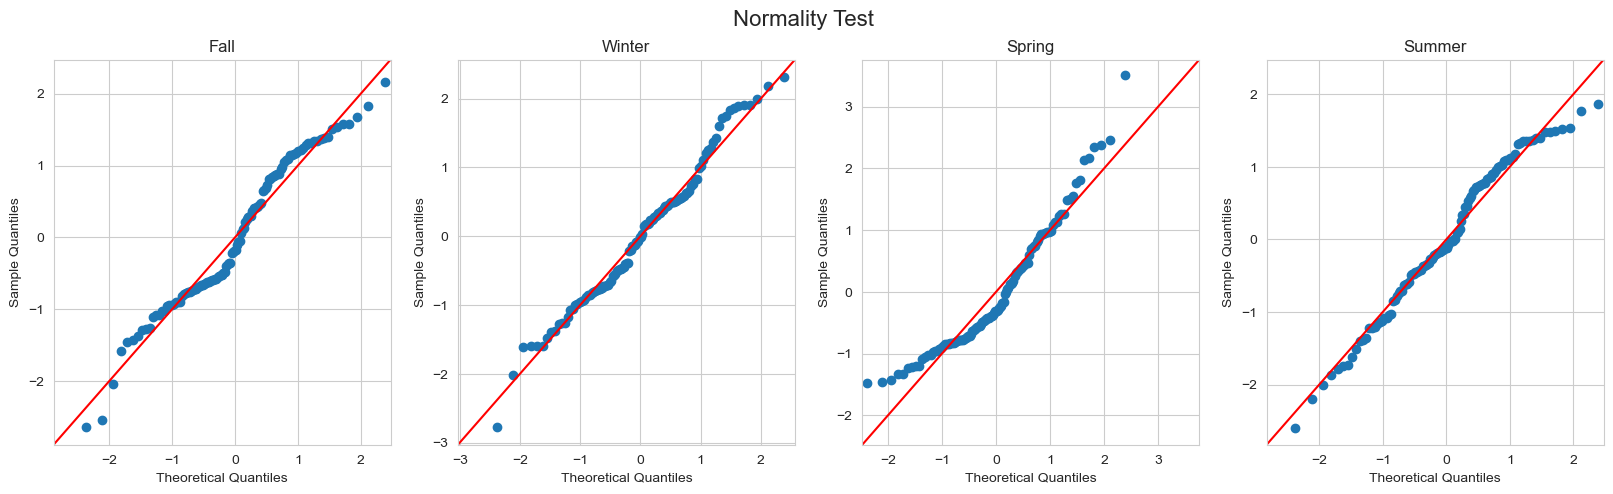

In [239]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))

sm.qqplot(fall,  fit=True, line='45', ax=axes[0] );
axes[0].set_title("Fall")
sm.qqplot(winter,  fit=True, line='45', ax=axes[1] );
axes[1].set_title("Winter")
sm.qqplot(spring,  fit=True, line='45', ax=axes[2] );
axes[2].set_title("Spring")
sm.qqplot(summer,  fit=True, line='45', ax=axes[3] );
axes[3].set_title("Summer")

plt.suptitle("Normality Test", fontsize=16);

<b style="padding: 2px 8px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;">Observations</b>
- From above plot we can see that the distribution is not exactly normal distribution.

### <a id='toc4_3_3_'></a>[ANOVA](#toc0_)

In [190]:
f_oneway(spring,summer,fall,winter)

F_onewayResult(statistic=80.05047897880664, pvalue=1.506580502991247e-41)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- Since p value is extremely small we reject the null hypothesis.
- We can say that demand for electric bikes is dependent on different seasons.

## <a id='toc4_4_'></a>[Comparison between weather conditions](#toc0_)

- Ho : Demand is independent of weather conditions.  
- Ha : Demand is not independent of weather conditions. 


In [9]:
weather_grouped_daily=db.sql("SELECT weather, sum(count) count, sum(casual) casual, sum(registered) registered from df group by date, weather").to_df()
weather_grouped_daily

weather   count  casual  registered
0         Clear Weather   622.0    47.0       575.0
1         Clear Weather  1159.0   248.0       911.0
2    Light Rain or Snow     1.0     0.0         1.0
3       Cloudy or Misty   664.0    26.0       638.0
4       Cloudy or Misty    33.0     0.0        33.0
..                  ...     ...     ...         ...
963     Cloudy or Misty  3025.0   501.0      2524.0
964       Clear Weather  4066.0   303.0      3763.0
965       Clear Weather   433.0    42.0       391.0
966     Cloudy or Misty  1866.0   320.0      1546.0
967     Cloudy or Misty    40.0     2.0        38.0

[968 rows x 4 columns]

In [10]:
all_weathers = list(weather_grouped_daily["weather"].unique())
all_weathers

['Clear Weather',
 'Light Rain or Snow',
 'Cloudy or Misty',
 'Heavy Rain or Snow']

In [11]:
light_rain_snow = weather_grouped_daily[weather_grouped_daily['weather'] == all_weathers[0]]["count"]
clear_weather = weather_grouped_daily[weather_grouped_daily['weather'] == all_weathers[1]]["count"]
cloudy_misty = weather_grouped_daily[weather_grouped_daily['weather'] == all_weathers[2]]["count"]
# heavy_rain_snow = weather_grouped_daily[weather_grouped_daily['weather'] == all_weathers[3]]["count"]

### <a id='toc4_4_1_'></a>[Variance check](#toc0_)

- H0: Groups have equal variances
- H1: Groups have different variances

In [250]:
levene(light_rain_snow, clear_weather, cloudy_misty)

LeveneResult(statistic=139.42307438642126, pvalue=6.545722170352777e-54)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- From above p value we can say that there is unequal variance between weather conditions.

### <a id='toc4_4_2_'></a>[Normality Test](#toc0_)

In [251]:
shapiro(light_rain_snow)
shapiro(clear_weather)
shapiro(cloudy_misty)
# shapiro(heavy_rain_snow)

ShapiroResult(statistic=0.8369169235229492, pvalue=3.36847439047841e-13)

ShapiroResult(statistic=0.9705866575241089, pvalue=1.1694455537281101e-07)

ShapiroResult(statistic=0.8786937594413757, pvalue=6.997944805825062e-16)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- From above tests we can say that the distributions are not normal.

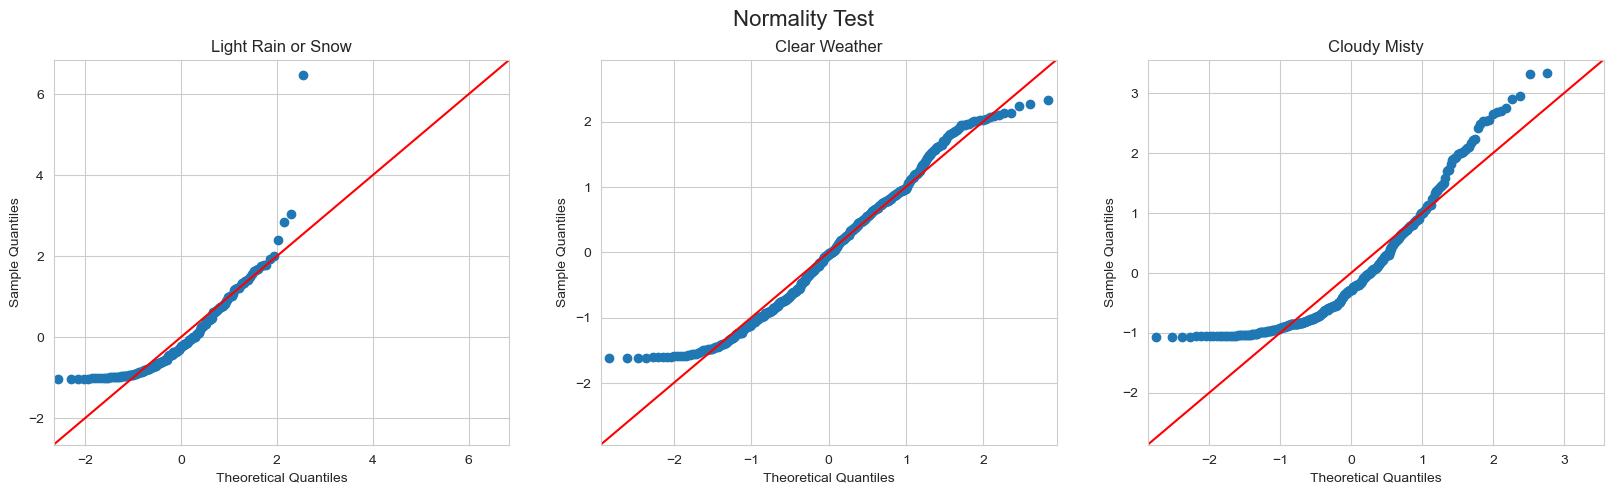

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

sm.qqplot(light_rain_snow,  fit=True, line='45', ax=axes[0] );
axes[0].set_title("Light Rain or Snow")
sm.qqplot(clear_weather,  fit=True, line='45', ax=axes[1] );
axes[1].set_title("Clear Weather")
sm.qqplot(cloudy_misty,  fit=True, line='45', ax=axes[2] );
axes[2].set_title("Cloudy Misty")
plt.suptitle("Normality Test", fontsize=16);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>
- From above plot we can say that the distributions are not normal

### <a id='toc4_4_3_'></a>[ANOVA Test](#toc0_)

In [16]:
f_oneway(light_rain_snow, clear_weather, cloudy_misty)

F_onewayResult(statistic=244.7555835815733, pvalue=1.0951526874744494e-86)

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- We can see that p value is very small. Hence we reject the null hypothesis.
- We can say that demand is dependent on different weather conditions.

# <a id='toc5_'></a>[Recommendation and Insights](#toc0_)

- Working Day or Holiday does not contribute to demand changes.
- There appears to be increased number of casual users on weekends. 
- We can conclude that Weather and Season is a major contributor for changes in demand.
    - Clear weather has the highest demand. 
    - Light rain or snow has the lowest demand.
    - Fall, Summer and Winter Season has the higher demand.
    - Spring Season has the lowest demand.
- Humidity is not a contributing factor for changes in demand.
- Temperature is a major contributor for changes in demand.
  - As the temperature increases, the demand increases
  - Warm temperature(20-30 degrees Celsius) has the highest demand.
- Wind speed is minor contributor for changes in demand.
    - Demand decreases as the wind speed increases.
- Time of the day is a minor contributor for changes in demand.
    - Evening has the highest demand followed by Morning which is then followed by Afternoon.
- Yulu can convert weekend casual users to registered users by offering discount if they sign up during the weekends.
- Yulu can use above data to decrease or increase the amount of cycles deployed on the roads. This can decrease the maintenance cost and any other operational costs.
- On larger scale, Yulu can decrease the number of cycles deployed on the roads during Spring season and increase the number of cycles deployed on the roads during Summer, Fall and Winter season.